In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [12]:
wine_df = pd.read_csv('wine.csv')

In [46]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_df.drop_duplicates(inplace=True)

In [15]:
#To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s StandardScaler as the feature matrix is a mix of binary and continuous features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(wine_df)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03
mean,-8.298488e-16,2.740021e-16,-2.385468e-17,-1.286682e-16,7.711924e-17,-1.836075e-16,1.388800e-17,5.241674e-14,-1.386839e-15,-5.865580e-16,5.272538e-16,1.390679e-15
std,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00
min,-2.137008e+00,-2.238023e+00,-1.393258e+00,-1.200903e+00,-1.542254e+00,-1.426094e+00,-1.222457e+00,-3.553604e+00,-3.676535e+00,-1.926712e+00,-1.878873e+00,-3.186363e+00
25%,-6.972071e-01,-7.623226e-01,-9.328165e-01,-4.611571e-01,-3.671819e-01,-8.515696e-01,-7.433672e-01,-5.935822e-01,-6.438707e-01,-6.371766e-01,-8.619244e-01,-7.570404e-01
50%,-2.364707e-01,-5.180013e-02,-6.309377e-02,-2.392334e-01,-1.848432e-01,-1.812915e-01,-2.642772e-01,-4.789431e-03,1.376908e-03,-2.268699e-01,-2.147753e-01,4.576206e-01
75%,5.122260e-01,6.040667e-01,8.066290e-01,5.666484e-02,5.827504e-02,4.889867e-01,4.843008e-01,5.947087e-01,5.820998e-01,4.178978e-01,6.172735e-01,4.576206e-01
max,4.370894e+00,5.741690e+00,3.722758e+00,9.599383e+00,1.059340e+01,5.372442e+00,7.251446e+00,3.736721e+00,4.518110e+00,7.862034e+00,4.130369e+00,2.886943e+00


In [31]:

kmeans.fit(data_scaled)

C:\Users\18325\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=6, n_jobs=-1)

C:\Users\18325\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\18325\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\18325\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\18325\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

Text(0, 0.5, 'Inertia')

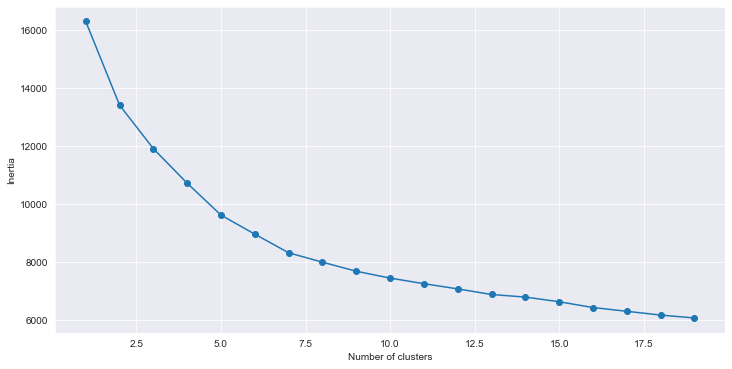

In [32]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [44]:
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
y_pred = kmeans.predict(data_scaled)


C:\Users\18325\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [45]:
# this feature will show the value count of points in each of the above-formed clusters
frame = pd.DataFrame(data_scaled)
frame['cluster'] = y_pred
frame['cluster'].value_counts()

2    434
1    280
0    224
4    216
5    178
3     27
Name: cluster, dtype: int64

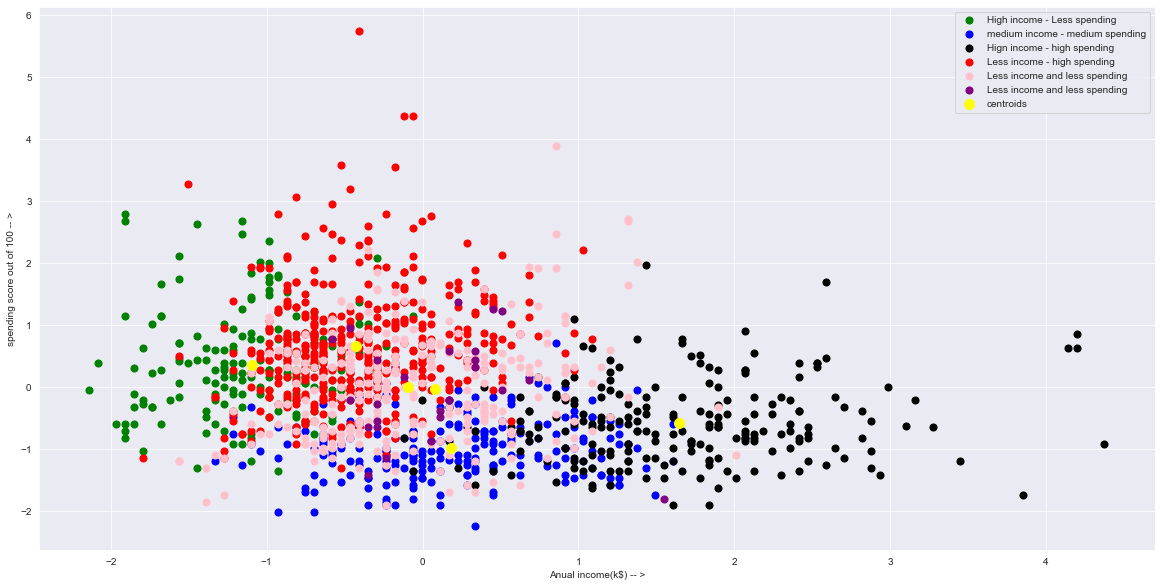

In [37]:
plt.figure(figsize = (20,10))
plt.scatter(data_scaled[y_pred == 0,0],data_scaled[y_pred == 0,1],s = 50, c = 'green', label = "High income - Less effect on quality")
plt.scatter(data_scaled[y_pred == 1,0],data_scaled[y_pred == 1,1],s = 50, c = 'blue', label = "medium income - medium effect on quality")
plt.scatter(data_scaled[y_pred == 2,0],data_scaled[y_pred == 2,1],s = 50, c = 'black', label = "Hign income - hdiumigh effect on quality")
plt.scatter(data_scaled[y_pred == 3,0],data_scaled[y_pred == 3,1],s = 50, c = 'red', label = "Less income - high effect on quality ")
plt.scatter(data_scaled[y_pred == 4,0],data_scaled[y_pred == 4,1],s = 50, c = 'pink', label = "Less income and less effect on quality")
plt.scatter(data_scaled[y_pred == 5,0],data_scaled[y_pred == 5,1],s = 50, c = 'purple', label = "Less income and medium effect on quality")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Anual income(k$) -- >")
plt.ylabel("spending score out of 100 -- >")
plt.legend()
plt.show()

C:\Users\18325\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

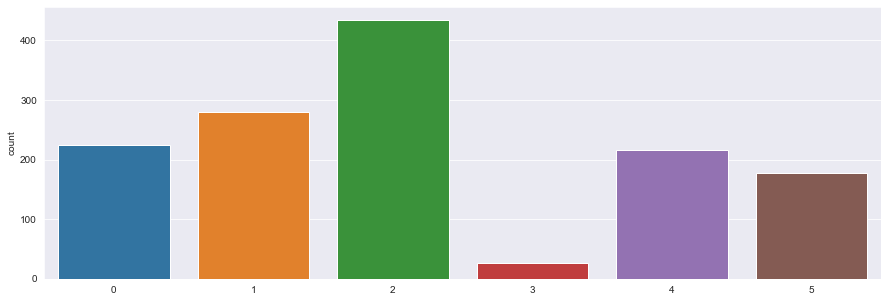

In [47]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_pred)

In [39]:
#Now I'm going to include 3 independant variables
x = wine_df[['fixed acidity','volatile acidity','citric acid']].values

C:\Users\18325\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


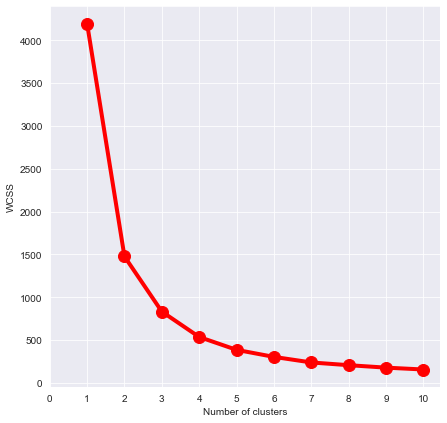

In [40]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = ['fixed acidity','volatile acidity','citric acid']
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [41]:
#From the above elbow method, we can see that the optimal number of clusters == 4
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

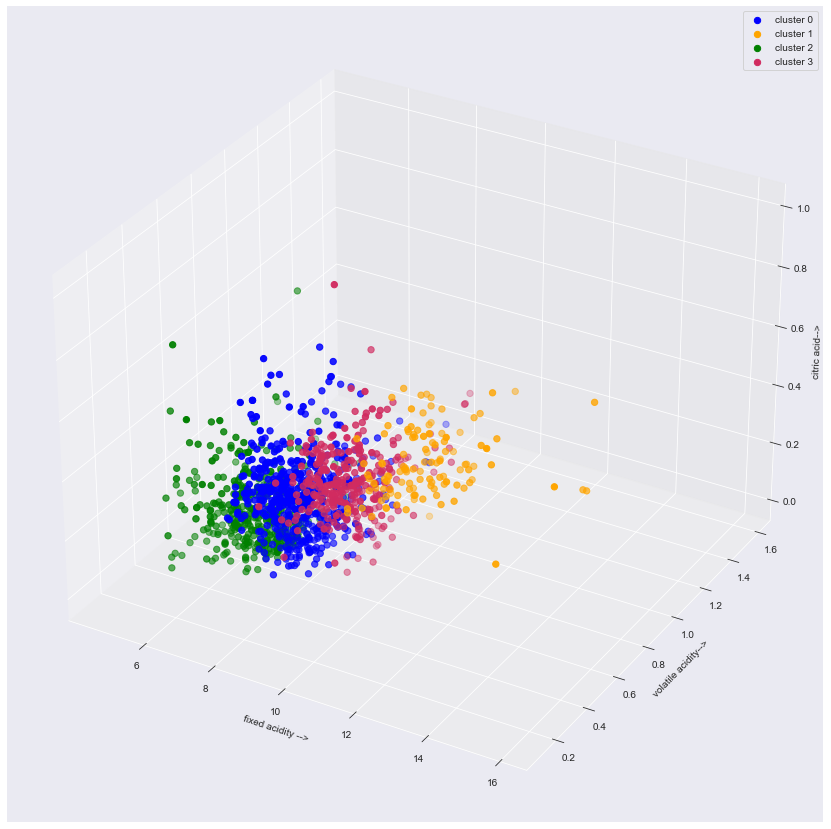

In [43]:
## 3d scatterplot to present of 3 variables
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.set_xlabel('fixed acidity -->')
ax.set_ylabel('volatile acidity-->')
ax.set_zlabel('citric acid-->')
ax.legend()
plt.show()